In [8]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [9]:
num_agents = 200
num_iterations = 500
num_params = 6
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [10]:
default = utils.read_csv("temp/default.csv")[0]
default_params = default[:num_params]
default_metrics = default[num_params:]

In [11]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


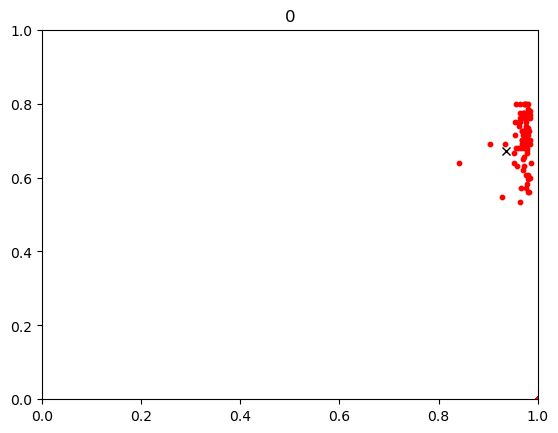

In [12]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0, 1)
    ax.set_ylim(0., 1)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('temp/metrics.gif', writer='pillow')


In [13]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [14]:
len(pareto_front)

17

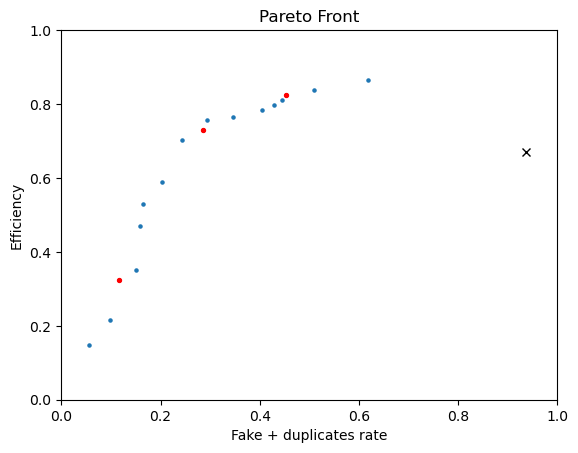

In [15]:
point1 = pareto_front[2]
point2 = pareto_front[8]
point3 = pareto_front[14]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[num_params + 1], point2[num_params + 1], point3[num_params + 1]], 
            [1 - point1[num_params], 1 - point2[num_params], 1 - point3[num_params]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0, 1)
plt.ylim(0., 1)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.savefig('../pf.png')
plt.show()


In [21]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.001818514142102313, 0.002088084284242047, 0.06287703319331067, 0.13829076099932555, 0.6986684161591196, 12.27776320853715, 680.3142847287338, 605.9513552617277, 720.3150577721096, 620.0931132820957, 772.4277681096903, 754.5195240427652, 596.0342837363962, 625.9028206629616, 746.3011126046829, 683.6197834460568, 613.0969902440069, 577.8191570732929, 683.9409933790091, 760.5922439830225, 641.8433942447074, 569.320161229562, 843.8632978834354, 585.4945218576288, 709.2596185800348]
[0.001711735025830731, 0.002878143240910575, 0.08356576089233587, 0.15163784211732564, 0.6715714144103679, 13.112104240757505, 705.2467774693466, 605.9183319214621, 715.3722957006718, 642.7285985263991, 723.2823158313879, 823.2720534212476, 528.6265467619615, 725.2715485283796, 739.5999385618375, 629.4299249422963, 565.1378187396923, 695.6146210969649, 816.743051775838, 545.7298329547216, 830.3215775557387, 681.5929099661248, 809.1183053395249, 640.8567180601672, 680.3059397829861]
[0.00206139811708576, 0.004

In [22]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [23]:
utils.write_csv('MTV/selected_params.csv', selected_params)

In [22]:
print(point1)
print(point2)
print(point3)

[1.76056880e-03 3.05575967e-03 1.02662258e-01 1.93861532e-01
 6.31895961e-01 1.28051644e+01 7.89507667e+02 7.69619943e+02
 7.63815334e+02 5.92943168e+02 5.93723226e+02 8.18590549e+02
 5.70462732e+02 7.12939106e+02 7.32436782e+02 6.12604755e+02
 5.77333258e+02 7.42352189e+02 7.23348694e+02 6.00106846e+02
 6.46787718e+02 7.52196150e+02 8.72252396e+02 6.21762431e+02
 6.32073461e+02 2.68403352e-01 2.57286623e-02]
[2.11710122e-03 3.68461808e-03 1.31330885e-01 2.74251372e-01
 6.26529578e-01 1.18742730e+01 8.47324946e+02 6.92275552e+02
 7.48969396e+02 6.57501228e+02 6.44501409e+02 8.77369782e+02
 5.33445023e+02 5.89644802e+02 7.97552649e+02 5.98489001e+02
 4.86028184e+02 8.15523898e+02 7.19732612e+02 5.36817092e+02
 7.28005676e+02 7.80485662e+02 9.17126810e+02 5.51989287e+02
 5.68514717e+02 2.59951245e-01 4.56397470e-02]
[2.19154923e-03 4.00629168e-03 1.93440825e-01 2.85325422e-01
 5.78102263e-01 1.31485240e+01 8.23157823e+02 9.19091462e+02
 8.91185738e+02 5.71917221e+02 5.50951671e+02 6.2346

In [44]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))



In [15]:
import uproot

In [16]:
uproot_file = uproot.open("input/phase2_0.root")

In [17]:
uproot_file["Events"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventAuxiliary       | edm::EventAuxiliary      | AsObjects(Model_edm_3a3a_Ev...
EventProductProve... | std::vector<edm::Stor... | AsJagged(AsStridedObjects(M...
EventSelections      | std::vector<edm::Hash... | AsObjects(AsVector(True, Mo...
BranchListIndexes    | std::vector<uint16_t>    | AsJagged(AsDtype('>u2'), he...
GenEventInfoProdu... | edm::Wrapper<GenEvent... | AsGroup(<TBranchElement 'Ge...
GenEventInfoProdu... | GenEventInfoProduct      | AsObjects(Model_GenEventInf...
GenEventInfoProdu... | bool                     | AsDtype('bool')
edmHepMCProduct_L... | edm::Wrapper<edm::Hep... | AsGroup(<TBranchElement 'ed...
edmHepMCProduct_L... | edm::HepMCProduct        | AsObjects(Model_edm_3a3a_He...
edmHepMCProduct_L... | bool                     | AsDtype('bool')
edmHepMCProduct_g... | edm::Wrapper<edm::Hep... | AsGroup(

IndexError: list index out of range